<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Libraries" data-toc-modified-id="Loading-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Libraries</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Gradient Boost</a></span></li></ul></div>

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import os
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv('Datasets/mobile_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<i> <b> <font color = "red">No Null values

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.set_index('User ID',inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


# Visualization

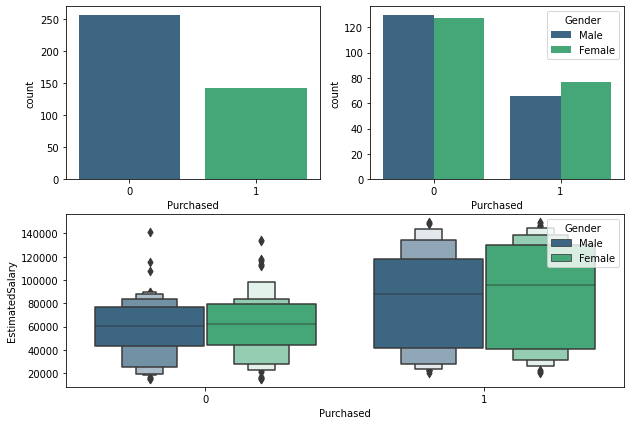

In [6]:
plt.figure(figsize = (10,7))
plt.subplot(2,2,1)
sns.countplot(data = df,x = 'Purchased',palette='viridis')
plt.subplot(2,2,2)
sns.countplot(data = df,x = 'Purchased',hue = 'Gender',palette='viridis')
plt.subplot(2,1,2)
sns.boxenplot(data = df,y = 'EstimatedSalary',x = 'Purchased',hue = 'Gender',palette='viridis')

plt.show()

<strong> In the dataset the number of users who purchased are less as compared to who do not purchased . <br>
  Dataset is not Balanced

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

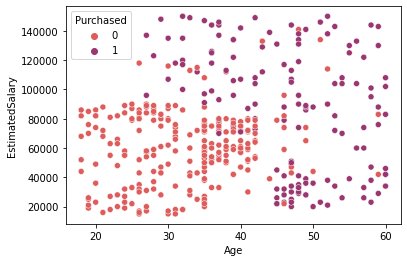

In [7]:
sns.scatterplot(data = df , x = 'Age' , y = 'EstimatedSalary' , hue  = 'Purchased',palette='flare')

<i><font color = "green"> We can clearly see here that a tree based model will do good here as the data can be separated using horizontal and vertical lines<i>

# Splitting Data

In [8]:
X = df.drop('Purchased' , axis = 1)
y = df['Purchased']
X.shape,y.shape

((400, 3), (400,))

In [9]:
from sklearn.model_selection import train_test_split
## Data is less
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 3), (100, 3), (300,), (100,))

# Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc = StandardScaler()
label_encoder = LabelEncoder()
X_train['Gender'] =label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [13]:
from sklearn.metrics import plot_precision_recall_curve,accuracy_score,precision_score,confusion_matrix , recall_score , f1_score,roc_auc_score

In [14]:
accuracy_score(y_pred , y_test)

0.89

<strong><font color = "purple" > Accuracy can be misleading here

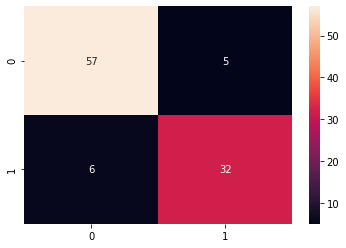

In [15]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True);

<Strong><font color = "teal">There are 11 Misclassifications

In [16]:
print("Precision score : ",precision_score(y_pred , y_test))
print("Recall score : ",recall_score(y_pred , y_test))
print("F1 score : ",f1_score(y_pred , y_test))
print("AUC ROC score : ",roc_auc_score(y_pred , y_test))

Precision score :  0.8648648648648649
Recall score :  0.8421052631578947
F1 score :  0.8533333333333334
AUC ROC score :  0.880730050933786


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [18]:
accuracy_score(y_pred , y_test)

0.88

<strong><font color = "purple" > Accuracy can be misleading here

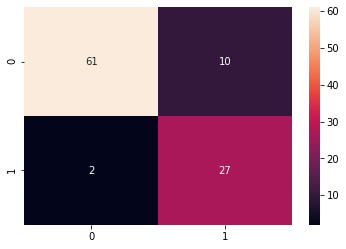

In [19]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot = True);

In [20]:
print("Precision score : ",precision_score(y_pred , y_test))
print("Recall score : ",recall_score(y_pred , y_test))
print("F1 score : ",f1_score(y_pred , y_test))
print("AUC ROC score : ",roc_auc_score(y_pred , y_test))

Precision score :  0.7297297297297297
Recall score :  0.9310344827586207
F1 score :  0.8181818181818181
AUC ROC score :  0.8950947061680427


# Support Vector Machine

In [21]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)

In [22]:
accuracy_score(y_pred , y_test)

0.93


<strong><font color = "purple" > Accuracy can be misleading here


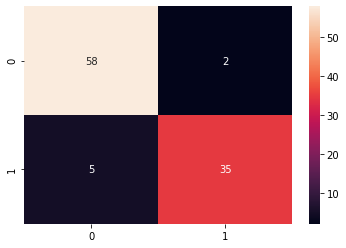

In [23]:

sns.heatmap(confusion_matrix(y_pred,y_test),annot = True);

In [24]:
print("Precision score : ",precision_score(y_pred , y_test))
print("Recall score : ",recall_score(y_pred , y_test))
print("F1 score : ",f1_score(y_pred , y_test))
print("AUC ROC score : ",roc_auc_score(y_pred , y_test))

Precision score :  0.9459459459459459
Recall score :  0.875
F1 score :  0.9090909090909091
AUC ROC score :  0.9208333333333333


# AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier 
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)

In [26]:
accuracy_score(y_pred , y_test)

0.91


<strong><font color = "purple" > Accuracy can be misleading here


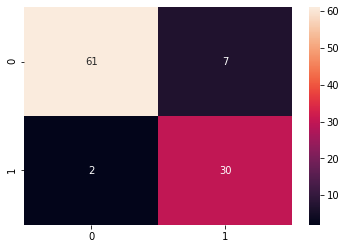

In [27]:

sns.heatmap(confusion_matrix(y_pred,y_test),annot = True);

In [28]:
print("Precision score : ",precision_score(y_pred , y_test))
print("Recall score : ",recall_score(y_pred , y_test))
print("F1 score : ",f1_score(y_pred , y_test))
print("AUC ROC score : ",roc_auc_score(y_pred , y_test))

Precision score :  0.8108108108108109
Recall score :  0.9375
F1 score :  0.8695652173913043
AUC ROC score :  0.9172794117647058


# Gradient Boost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [30]:
accuracy_score(y_pred , y_test)

0.89


<strong><font color = "purple" > Accuracy can be misleading here


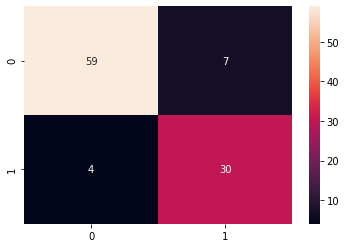

In [31]:

sns.heatmap(confusion_matrix(y_pred,y_test),annot = True);

In [32]:
print("Precision score : ",precision_score(y_pred , y_test))
print("Recall score : ",recall_score(y_pred , y_test))
print("F1 score : ",f1_score(y_pred , y_test))
print("AUC ROC score : ",roc_auc_score(y_pred , y_test))

Precision score :  0.8108108108108109
Recall score :  0.8823529411764706
F1 score :  0.8450704225352113
AUC ROC score :  0.8881461675579322
